In [2]:
%pylab inline
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# 1. Load data

In [3]:
data = pd.read_csv('uber-raw-data-apr14.csv')

In [4]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [5]:
dt = '4/30/2014 23:22:00'

In [6]:
dt = pd.to_datetime(dt)

In [7]:
# Convert datetime and some useful columns
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [8]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


In [9]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

In [11]:
data.head()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


In [12]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# analysis

Text(0.5, 1.0, 'Frequency by DoM - uber - Apr 2014')

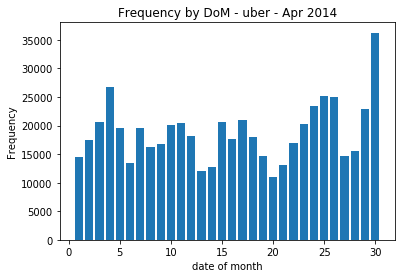

In [13]:
# Analyze the DOM
hist(data.dom, bins = 30, rwidth=0.8, range=(0.5,30.5))
xlabel('date of month')
ylabel('Frequency')
title('Frequency by DoM - uber - Apr 2014')

In [15]:
# for k, rows in  data.groupby('dom'):
   # print((k, len(rows)))
    
def count_rows(rows):
    return len(rows)
    
by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

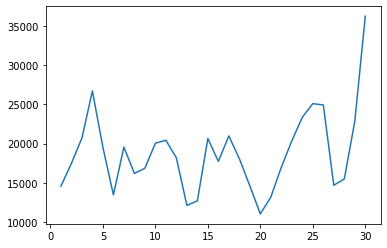

In [16]:
plot(by_date)

<BarContainer object of 30 artists>

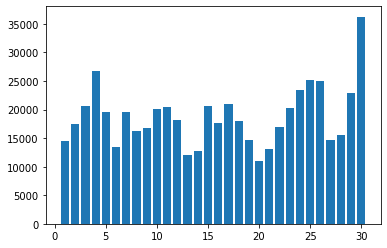

In [17]:
bar(range(1, 31), by_date)

In [20]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

''

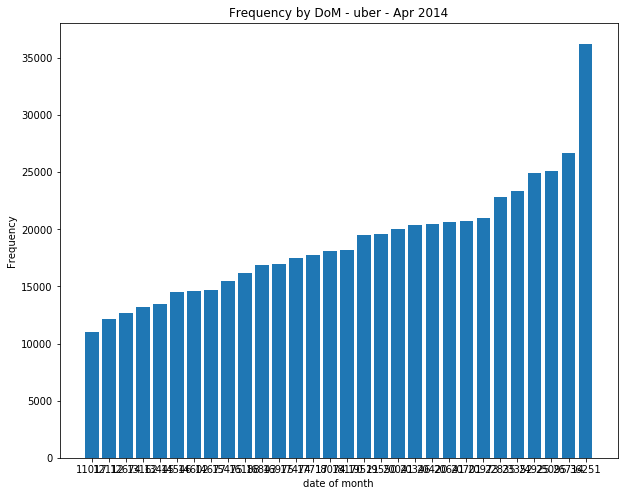

In [32]:
figsize(10, 8)
bar(range(1, 31), by_date_sorted)
xticks(range(1, 31), by_date_sorted)
xlabel('date of month')
ylabel('Frequency')
title('Frequency by DoM - uber - Apr 2014')
;

## Analysis hour

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

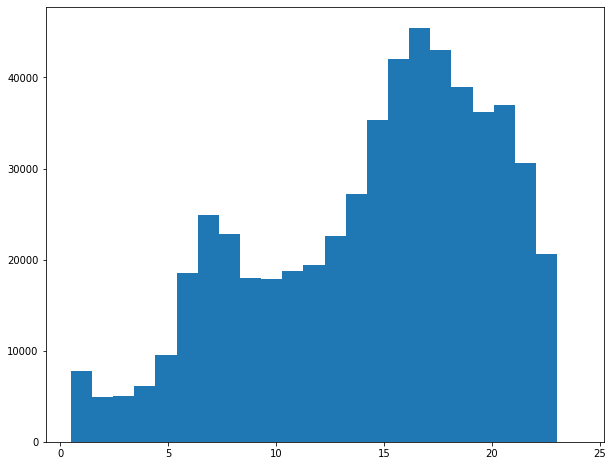

In [36]:
hist(data.hour, bins=24, range=(.5,24))

# Analyze the weekday

([<matplotlib.axis.XTick at 0x24eb26d3948>,
 <a list of 7 Text xticklabel objects>)

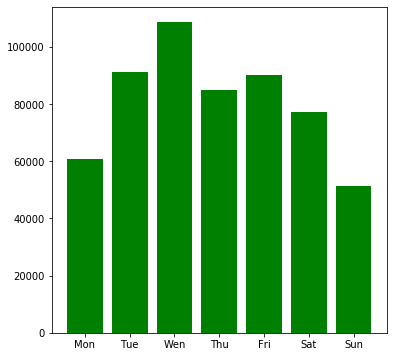

In [50]:
figsize(6,6)
hist(data.weekday, bins=7, range=(-.5, 6.5), rwidth=.8, color='green')
xticks(range(7), 'Mon Tue Wen Thu Fri Sat Sun'.split())

# cross analysis (hour, dow)

In [59]:
by_h_w = data.groupby('weekday hour' .split()).apply(count_rows).unstack()
by_h_w

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


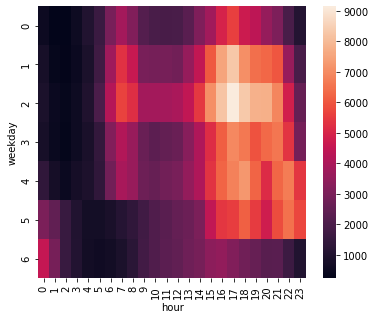

In [63]:
figsize(6, 5)
sn.heatmap(by_h_w)

# by lat and lon

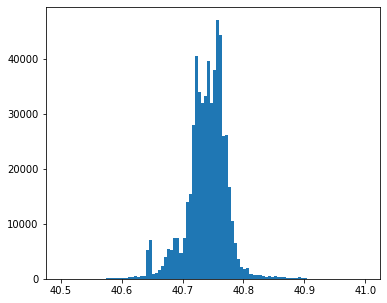

In [72]:
hist(data['Lat'], bins=100, range=(40.5, 41));

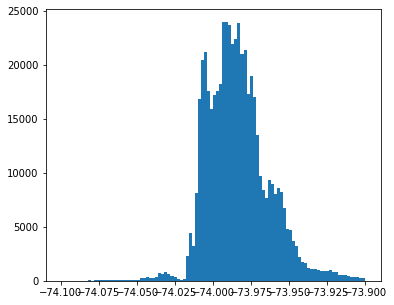

In [71]:
hist(data['Lon'], bins=100, range=(-74.1, -73.9));

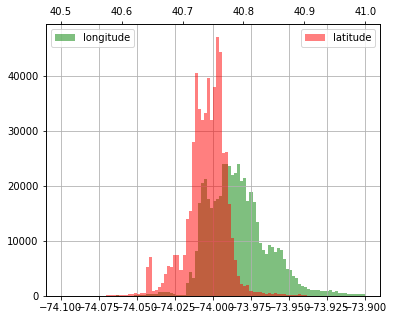

In [80]:
hist(data['Lon'], bins=100, range=(-74.1, -73.9), color='g', alpha=.5, label='longitude');
grid()
legend(loc='upper left')
twiny()
hist(data['Lat'], bins=100, range=(40.5, 41), color='r', alpha=.5, label='latitude');
legend(loc='best')